In [133]:
#Задача 1

# Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
#    zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
#    ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
#    Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату 
#    (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
#    Произвести расчет как с использованием intercept, так и без.

import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

print(zp)
print(ks)

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [134]:
x =zp
y = ks
b = round(((np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)),3)
b

2.621

In [135]:
a = round((np.mean(y) - b * np.mean(x)),3)
a

444.131

In [136]:
y_hat = a + b * x
y_hat

array([535.866, 562.076, 942.121, 968.331, 548.971, 627.601, 585.665,
       837.281, 758.651, 732.441])

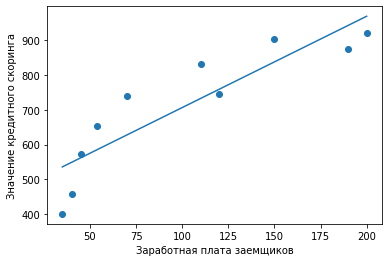

In [137]:
# уравнение регрессии построили. Теперь посмотрим как исходные данные согласуются с этим уровнением на графике

import matplotlib.pyplot as plt

import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_hat': y_hat}, columns=['x', 'y', 'y_hat'])

df = df.sort_values('x')

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_hat'])
plt.xlabel('Заработная плата заемщиков')
plt.ylabel('Значение кредитного скоринга')
plt.show()

In [138]:
# Попробуем матричный метод
import seaborn as sns

x = x.reshape(10,1)
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [139]:
y = y.reshape(10,1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [140]:
# Произведем рассчет сначала без использования intercept
b_bi=np.dot(np.linalg.inv(np.dot(x.T,x)),x.T@y)
b_bi

array([[5.88982042]])

In [141]:
y_bi = x * b_bi[0]
y_bi


array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

In [142]:
# А теперь посчитаем с использованием intercept

In [143]:
x = np.hstack([np.ones((10,1)),x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [144]:
b_si=np.dot(np.linalg.inv(np.dot(x.T,x)),x.T@y)
b_si

array([[444.17735732],
       [  2.62053888]])

In [145]:
# Уберем единичный столбец
x = x[:,1:]
x

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [146]:
# Приведем к удобочитаемому виду
y_bi = y_bi.reshape(1,10)
x = x.reshape(1,10)
y = y.reshape(1,10)
x[0]

array([ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

In [147]:
# И найдем значения Y с использованием intercept
y_si = b_si[0] + b_si[1] * x[0]
y_si

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

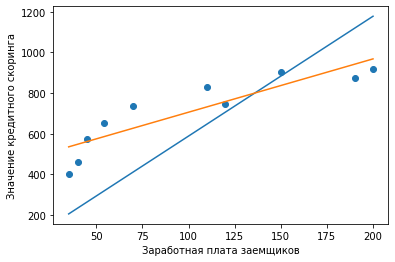

In [148]:
# Посмотрим что получилось на графике
df = pd.DataFrame({'x': x[0], 'y': y[0], 'y_bi': y_bi[0], 'y_si': y_si}, columns=['x', 'y', 'y_bi', 'y_si'])

df = df.sort_values('x')

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_bi'])
plt.plot(df['x'], df['y_si'])
plt.xlabel('Заработная плата заемщиков')
plt.ylabel('Значение кредитного скоринга')
plt.show()

In [149]:
# Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x =zp

y = ks

n = len(x)

def mse_ (B1, y=y, x=x, n=10):
    return np.sum((B1*x-y)**2)/n

alpha = 1e-6
alpha

B1=2

In [150]:
for i in range (4001):
    B1 -= alpha *  (2/n) * np.sum((B1*x-y)*x)
    if i%400 == 0:
        print ('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i,B1=B1,mse=mse_(B1)))

Iteration: 0, B1=2.107177, mse=253637.8412260619
Iteration: 400, B1=5.889767437196752, mse=56516.858454392954
Iteration: 800, B1=5.889820419390563, mse=56516.85841571941
Iteration: 1200, B1=5.889820420132673, mse=56516.85841571943
Iteration: 1600, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2000, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2400, B1=5.889820420132673, mse=56516.85841571943
Iteration: 2800, B1=5.889820420132673, mse=56516.85841571943
Iteration: 3200, B1=5.889820420132673, mse=56516.85841571943
Iteration: 3600, B1=5.889820420132673, mse=56516.85841571943
Iteration: 4000, B1=5.889820420132673, mse=56516.85841571943


In [151]:
# Задача 4 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (с intercept).
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x =zp

y = ks

n = len(x)

def mse_ (B1, B0, y=y, x=x, n=10):
    return np.sum((B1*x+B0-y)**2)/n

alpha = 0.00004 # Как оказалось, подобрать альфу - самое основное. Подбором определил вот это число.
alpha

B1 = 0.2
B0 = 0.1

In [152]:
for i in range (400001): #y = B1*x + B0
    B1 -= alpha *  (2/n) * np.sum((B1*x+B0-y)*x)
    B0 -= alpha *  (2/n) * np.sum((B1*x+B0-y)*1)  # Частная производная B0, поэтому вторым множителем идет не х, как у B1, а единичка.
    if i%40000 == 0:
        print ('Iteration: {i}, B1={B1}, B0={B0}, mse={mse}'.format(i=i,B1=B1,B0=B0,mse=mse_(B1, B0)))

Iteration: 0, B1=6.470099200000002, B0=0.1042985552896, mse=61144.544558141555
Iteration: 40000, B1=4.072060498771763, B0=246.97159304495457, mse=16335.471345536313
Iteration: 80000, B1=3.2651371204394164, B0=356.60133589164786, mse=8415.912331527801
Iteration: 120000, B1=2.906794962776803, B0=405.2862044312992, mse=6854.087901167763
Iteration: 160000, B1=2.7476607681229055, B0=426.9063994913028, mse=6546.078888676646
Iteration: 200000, B1=2.676991740305151, B0=436.50759280769637, mse=6485.3361125159245
Iteration: 240000, B1=2.645608721064238, B0=440.7713338536487, mse=6473.356966756929
Iteration: 280000, B1=2.631672008941689, B0=442.66479512537563, mse=6470.994547022672
Iteration: 320000, B1=2.625482931233962, B0=443.5056519102647, mse=6470.528651781644
Iteration: 360000, B1=2.6227344578109504, B0=443.8790633675067, mse=6470.436772098935
Iteration: 400000, B1=2.621513903390138, B0=444.04488960439255, mse=6470.418652411607


In [ ]:
#Задача 3 
#В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез 
#используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

# Ответ: При небольшом объеме выборки (n<20-30) используем таблицу Стьюдента, при больших - Лапласа.